In [1]:
!pip3 install Bio

     |████████████████████████████████| 102kB 6.0MB/s 
     |████████████████████████████████| 2.3MB 12.7MB/s 


In [2]:
from Bio import SeqIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [3]:
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive/ecami"

Mounted at /content/drive
count_the_number_of_labels.ipynb  dataset
datapreprocessing.ipynb		  Untitled0.ipynb


In [4]:
FULLDATASET = '/content/drive/My Drive/ecami/dataset/ecamidata.fa'
PARTIALDATASET =  '/content/drive/My Drive/ecami/dataset/testdata.fa'

In [5]:
with open(FULLDATASET) as fasta_file:  # Will close handle cleanly
    identifiers = []
    sequences = []
    effects = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifier = seq_record.id.split('|')[0]
        effect = ''.join(seq_record.id.split('|')[1:])
        identifiers.append(identifier)
        sequences.append(seq_record.seq.__str__())
        effects.append(effect)

In [6]:
s1 = pd.Series(identifiers, name='ID')
s2 = pd.Series(sequences, name='sequence')
s3 = pd.Series(effects, name='effect')
df = pd.DataFrame(dict(ID=s1, sequence=s2, effect=s3)).set_index(['ID'])

In [7]:
df

,sequence,effect
ID,,
AWI06117.1,MIVQSTNSNRIGENLLKLGYISEEQLEIALKIQKKTNKLIGNVLVE...,GT2
AWI06118.1,MLSVVVPVYNEEKNVEELVKRIKAVLTNIEYEIVFVDDSVDNTPQI...,GT2
AWH92887.1,MSQSPGWARFAGRELPTWYDDVKLGVFVHWGPYSVPRWAPRVPDIQ...,GH29
AWH89110.1,MGELYPVLKVSVVIPVYNEEESLPALLSRTIAACKQLKQPYEIILV...,GT2
AWH84670.1,MKKLIALACFLLAVVNAANAQELKSPNGAFTMKFSLQAGGVPTYSL...,GH97
...,...,...
EEC72531.1,MAELRHSTVAAAAARSSNSPAKRDSDASAASSPFASTSSARGRGGG...,GH106
EEC81207.1,MAELRHATAAAAATRASSSPAKRDAESYASSSPFVASSSSPRGGGG...,GH106
EEE52851.1,MSVALYARGGGCGAKAAAARRSGRGGGGRRRAAVVLLLALAYVAGL...,GH106


In [8]:
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), [int(.6*len(df)), int(.8*len(df))])

In [9]:
len(df_train), len(df_val), len(df_test)

(639796, 213265, 213266)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639796 entries, CRY86472.1 to ASU99572.1
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sequence  639796 non-null  object
 1   effect    639796 non-null  object
dtypes: object(2)
memory usage: 14.6+ MB


In [11]:
df_train.head(1)['sequence'].values[0]

'mklrwfaflvvilagcsskqdyrnppwnaevpvkramqwmpisekagaawgvdphlitaiiaiesggnpnavsksnaiglmqlkastsgrdvyrrmgwrgepttselknpernismgaaylsilengplagikdpqvmqyalvvsyangagallrtfssdrkkaiekindldadeffehvvdnhpapqapryiwklqqaldam'

In [12]:
len(df_train.head(1)['sequence'].values[0])

203

In [13]:
df_train['seq_char_count']= df_train['sequence'].apply(lambda x: len(x))
df_val['seq_char_count']= df_val['sequence'].apply(lambda x: len(x))
df_test['seq_char_count']= df_test['sequence'].apply(lambda x: len(x))

In [14]:
def plot_seq_count(df, data_name):
  sns.distplot(df['seq_char_count'].values)
  plt.title(f'Sequence char count: {data_name}')
  plt.grid(True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

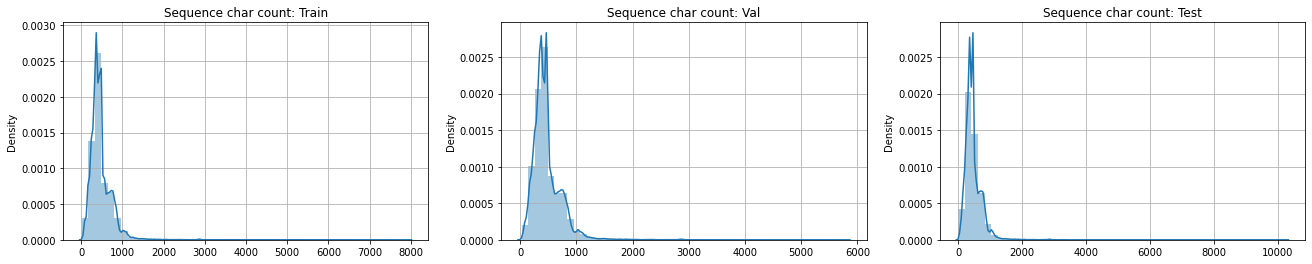

In [15]:
plt.subplot(1, 3, 1)
plot_seq_count(df_train, 'Train')

plt.subplot(1, 3, 2)
plot_seq_count(df_val, 'Val')

plt.subplot(1, 3, 3)
plot_seq_count(df_test, 'Test')

plt.subplots_adjust(right=3.0)
plt.show()

In [16]:
def get_code_freq(df, data_name):
  
  df = df.apply(lambda x: " ".join(x))
  
  codes = []
  for i in df: # concatination of all codes
    codes.extend(i)

  codes_dict= Counter(codes)
  codes_dict.pop(' ') # removing white space
  
  print(f'Codes: {data_name}')
  print(f'Total unique codes: {len(codes_dict.keys())}')

  df = pd.DataFrame({'Code': list(codes_dict.keys()), 'Freq': list(codes_dict.values())})
  return df.sort_values('Freq', ascending=False).reset_index()[['Code', 'Freq']]

In [17]:
# train code sequence
train_code_freq = get_code_freq(df_train['sequence'], 'Train')
train_code_freq

Codes: Train
Total unique codes: 50


,Code,Freq
0,L,21936886
1,A,21550078
2,G,18787702
3,V,16292019
4,S,15796839
5,D,14405851
6,T,13767853
7,R,13622228
8,I,13568649
9,E,13359004


In [20]:
# val code sequence
val_code_freq = get_code_freq(df_val['sequence'], 'Val')
val_code_freq

Codes: Val
Total unique codes: 48


,Code,Freq
0,L,7316901
1,A,7180402
2,G,6269164
3,V,5440013
4,S,5279972
5,D,4797084
6,T,4598717
7,R,4541279
8,I,4527148
9,E,4445953


In [21]:
# test code sequence
test_code_freq = get_code_freq(df_test['sequence'], 'Test')
test_code_freq

Codes: Test
Total unique codes: 47


,Code,Freq
0,L,7299769
1,A,7164268
2,G,6262269
3,V,5432656
4,S,5268015
5,D,4786962
6,T,4591194
7,R,4536986
8,I,4523841
9,E,4445402


In [22]:
def plot_code_freq(df, data_name):
  
  plt.title(f'Code frequency: {data_name}')
  sns.barplot(x='Code', y='Freq', data=df)

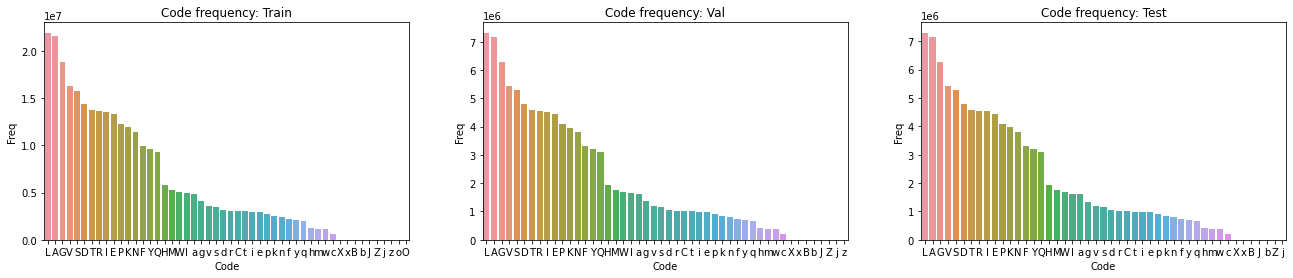

In [23]:

plt.subplot(1, 3, 1)
plot_code_freq(train_code_freq, 'Train')

plt.subplot(1, 3, 2)
plot_code_freq(val_code_freq, 'Val')

plt.subplot(1, 3, 3)
plot_code_freq(test_code_freq, 'Test')

plt.subplots_adjust(right=3.0)
plt.show()